In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data-2.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [33]:
df = df[df["UnitPrice"] >= 0]
df = df[df["Quantity"] >= 0]
df = df[df["Country"] != "Unspecified"]

df = df[(df["StockCode"].str.len() == 6) | (df["StockCode"].str.len() == 5) | (df["StockCode"].str.contains("gift"))]
df["GMV"] = df["Quantity"] * df["UnitPrice"]
df.to_csv("ne.csv")

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,528057.000000,528057.000000,395835.000000
mean,10.678372,3.255611,15302.930271
std,157.250632,4.376294,1709.685851
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,11.000000,4.130000,16805.000000
max,80995.000000,649.500000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530837 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530837 non-null  object        
 1   StockCode    530837 non-null  object        
 2   Description  530245 non-null  object        
 3   Quantity     530837 non-null  int64         
 4   InvoiceDate  530837 non-null  datetime64[ns]
 5   UnitPrice    530837 non-null  float64       
 6   CustomerID   397680 non-null  float64       
 7   Country      530837 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [8]:
gmv = df.groupby("StockCode").sum()
gmv["GMV"] = gmv["Quantity"] * gmv["UnitPrice"]
gmv

,Quantity,UnitPrice,CustomerID,GMV
StockCode,,,,
10002,1040,77.15,723842.0,80236.00
10080,495,9.04,333014.0,4474.80
10120,193,6.30,484879.0,1215.90
10123C,5,1.95,46701.0,9.75
10124A,16,2.10,81148.0,33.60
...,...,...,...,...
gift_0001_20,20,150.38,0.0,3007.60
gift_0001_30,37,175.53,0.0,6494.61
gift_0001_40,3,100.70,0.0,302.10


In [ ]:
df_country = df.groupby("Country").sum()[["GMV"]]
df_country.sort_values("GMV", inplace=True)
df_country

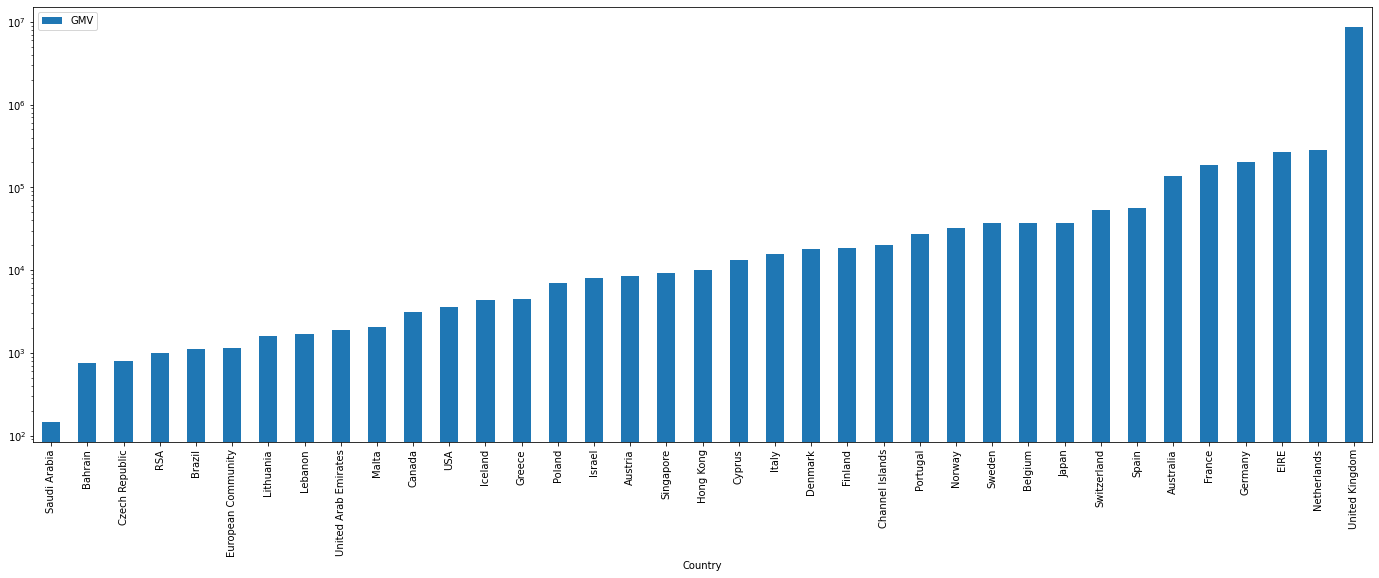

In [31]:
df_country.plot(kind="bar", y="GMV", figsize=(24,8), logy=True);

In [34]:
df.plot(kind="bar", y="Quantity", figsize=(24,8), logy=True);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F3E926A550> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_country[(df_country.index == "USA") | (df_country.index == "United Kingdom")].plot(kind="bar", y="Quantity", figsize=(24,8), logy=True);

In [ ]:
test = df_country[df_country.index != "United Kingdom"]
test.plot(kind="bar", y="GMV", figsize=(24,8));